In [15]:
from skimage import measure
from shapely.geometry import Polygon
from sklearn.metrics import f1_score
import json
import numpy as np

In [16]:
with open("empty_annotations.json") as file:
    gt = json.load(file)


In [17]:
empty_submit = dict()
empty_submit["images"] = gt["images"]
empty_submit["categories"] = gt["categories"]
empty_submit["annotations"] = []

### Credits to https://github.com/chrise96/image-to-coco-json-converter/tree/master

In [13]:
count_anns = 1
for img_id, img in enumerate(gt_mask, 0):
    for cls_id, cls in enumerate(img, 0):
        contours = measure.find_contours(cls)
        for contour in contours:            
            for i in range(len(contour)):
                row, col = contour[i]
                contour[i] = (col - 1, row - 1)

            # Simplify polygon
            poly = Polygon(contour)
            poly = poly.simplify(1.0, preserve_topology=False)
            
            if(poly.is_empty):
                continue
            segmentation = np.array(poly.exterior.coords).ravel().tolist()
            new_ann = dict()
            new_ann["id"] = count_anns
            new_ann["image_id"] = img_id
            new_ann["category_id"] = cls_id
            new_ann["segmentation"] = [segmentation]
            new_ann["area"] = poly.area
            x, y = contour.min(axis=0)
            w, h = contour.max(axis=0) - contour.min(axis=0)
            new_ann["bbox"]  = [int(x), int(y), int(w), int(h)]
            new_ann["iscrowd"] = 0
            new_ann["attributes"] = {
                "occluded": False
            }
            count_anns += 1
            empty_submit["annotations"].append(new_ann.copy())

In [14]:
with open("submit.json", "w") as file:
    json.dump(empty_submit, file)

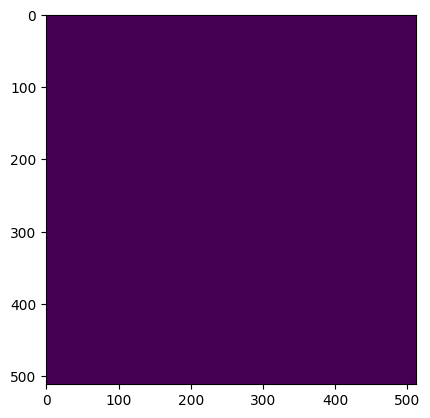

In [19]:
plt.imshow(gt_mask[2, 18])